
# **PROJECT OVERVIEW**
This project involves analyzing house sales data for Northwest Realtors. The goal is to provide insights and advice to homeowners in Northwest County on 
buying and selling houses.

## **BUISNESS PROBLEM**

## **OBJECTIVE**

## **DATASET UNDERSTANDING**
#### **Understanding the columns in the dataset**
* **id** - unique identified for a house
* **Date** - house was sold
* **Price** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors



In [1774]:
# Import relevant libraries to be used in the project
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
import seaborn as sns
import math
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('ggplot')

In [1775]:
# Data loading using panda libraries
df = pd.read_csv("kc_house_data.csv")
# Getting the size of the dataset
df.shape

(21597, 21)

In [1776]:
# Understanding the column datatype 
# getting an overview of the column with Null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

* From the above the following columns have Null values *Waterfront* *View* *year Renovated*
* converting sqft_basement datatype from object to numeric

In [1777]:
# convert square footage of the basement from object to numeric
df['sqft_basement'] = df['sqft_basement'].replace('?', pd.NA)
df['sqft_basement'] = pd.to_numeric(df['sqft_basement'])
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21143 non-null  float64
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [1778]:
# Previewing the first five records of the data
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [1779]:
# Getting the five discriptive statistics of data
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21143.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,291.851724,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,442.498337,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [1780]:
print("from the above statistics the mean price of houses is", df['price'].mean(), "\n with a standard deviation of ", df['price'].std() )

from the above statistics the mean price of houses is 540296.5735055795 
 with a standard deviation of  367368.1401013945


## **DATA PREPARATION**
### **Data Cleaning**
Data cleaning shall involve the following steps:
1. Check and resolve for duplicate values
2. Check and resolve for null values
3. Check and resolve for extraneous values
4. Perform further cleaning as needed

In [1781]:
#FUNCTIONS TO BE USED DURING DATA CLEANING

#Function to get the number of duplictes
def get_duplicates(df):
    df=df[df.duplicated(keep=False)]
    return df

# Function to get extraneous values i.e. values that look like placeholders or are exaggerated values
def extraneous_values(df):
    for col in df.columns:
        print(col, '\n', df[col].value_counts(normalize=True), '\n')

# Function to calculate percentage of missing data in a column
def missing_data(df, column):
    length_of_df=len(df)                                                    #getting the length of the dataframe
    missing_data= column.isna().sum()                                       #total number of missing data in column foreign_gross
    percentage_of_missing_data = round((missing_data/length_of_df*100),2)   #percentage of missing data in the foreign_gross column
    return print(f"Percentage of Missing Data: {percentage_of_missing_data}""%")


**Check and resolve for duplicate values in NorthWest County dataset**

In [1782]:
# Checking for duplicate values.
get_duplicates(df)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


In [1783]:
df.shape

(21597, 21)

**Check and resolve for null values in North West county dataset**

In [1784]:
# Checking missing Data
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement     454
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

##### **Percentage of missing data under column yr_renovated**

In [1785]:
missing_data(df, df['yr_renovated'])

Percentage of Missing Data: 17.79%


##### **Observation:** 
From the above the percentage for missing values for year renovated is significantly high at 17% which would greatly affect the dataset therefore we replace it with the most occuring value in the same column i.e zero(0)


In [1786]:
# Replacing NaN values in yr_renovated column
df["yr_renovated"].fillna(df["yr_renovated"].mode()[0], inplace= True)
df["yr_renovated"].value_counts()
len(df)

21597

##### **Percentage of missing data under column waterfront**

In [1787]:
missing_data(df, df['waterfront'])

Percentage of Missing Data: 11.0%


##### **Observation:** 
The Null values account for 11% of the dataset. This constitutes a significant percentage of the dataset therefore instead of to dropping them the missing values for the 'waterfront' column were replaced by the modal value of 'waterfronts' for all houses that share the same 'zipcode'. This method effectively imputes missing data based on the most frequent value within the specified group(zipcodes).

In [1788]:

# Function to replace nulls in column waterfront with the mode of waterfront for the same zipcode
def replace_null_with_mode(df, target_col, group_col):
    # Iterating through the rows with null values in the target column
    for index, row in df[df[target_col].isnull()].iterrows():
        # Getting the corresponding group value (zipcode)
        group_value = row[group_col]
        # Filtering the DataFrame to include only rows with the same group value and non-null target values
        filtered_df = df[(df[group_col] == group_value) & df[target_col].notnull()]
        # Getting the mode of the target column in the filtered DataFrame
        mode_value = filtered_df[target_col].mode()
        # Checking if mode_value is not empty
        if not mode_value.empty:
            # Replacing the null value with the mode value
            df.at[index, target_col] = mode_value[0]
    return df

# Replacing nulls in waterfront with the mode of waterfronts for the same zipcode
df = replace_null_with_mode(df, 'waterfront', 'zipcode')

len(df)


21597

##### **Percentage of missing data under column square footage of basement**

In [1789]:
missing_data(df, df['sqft_basement'])

Percentage of Missing Data: 2.1%


##### **Observation:** 
From the above the percentage for missing values for square footage of basement is low at 2%% which would not greatly affect the dataset therefore the missing values were droped

In [1790]:
# Droping missing record for year renovated
df = df.dropna()
df.isna().sum()
len(df)


21082

##### **Percentage of missing data under column of houses that have been viewed**

In [1791]:
missing_data(df, df['view'])
len(df)

Percentage of Missing Data: 0.0%


21082

##### **Observation:** 
Due to the drop in the missing values for square footage of basement the percentatege of missing values for vies=wed houses has dropped to zero percent

##### **Final Dataset Cleaned form Missing Value:** 


In [1792]:
df_clean_1 = df
df_clean_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21082 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21082 non-null  int64  
 1   date           21082 non-null  object 
 2   price          21082 non-null  float64
 3   bedrooms       21082 non-null  int64  
 4   bathrooms      21082 non-null  float64
 5   sqft_living    21082 non-null  int64  
 6   sqft_lot       21082 non-null  int64  
 7   floors         21082 non-null  float64
 8   waterfront     21082 non-null  object 
 9   view           21082 non-null  object 
 10  condition      21082 non-null  object 
 11  grade          21082 non-null  object 
 12  sqft_above     21082 non-null  int64  
 13  sqft_basement  21082 non-null  float64
 14  yr_built       21082 non-null  int64  
 15  yr_renovated   21082 non-null  float64
 16  zipcode        21082 non-null  int64  
 17  lat            21082 non-null  float64
 18  long       

### **Outlier Analysis**

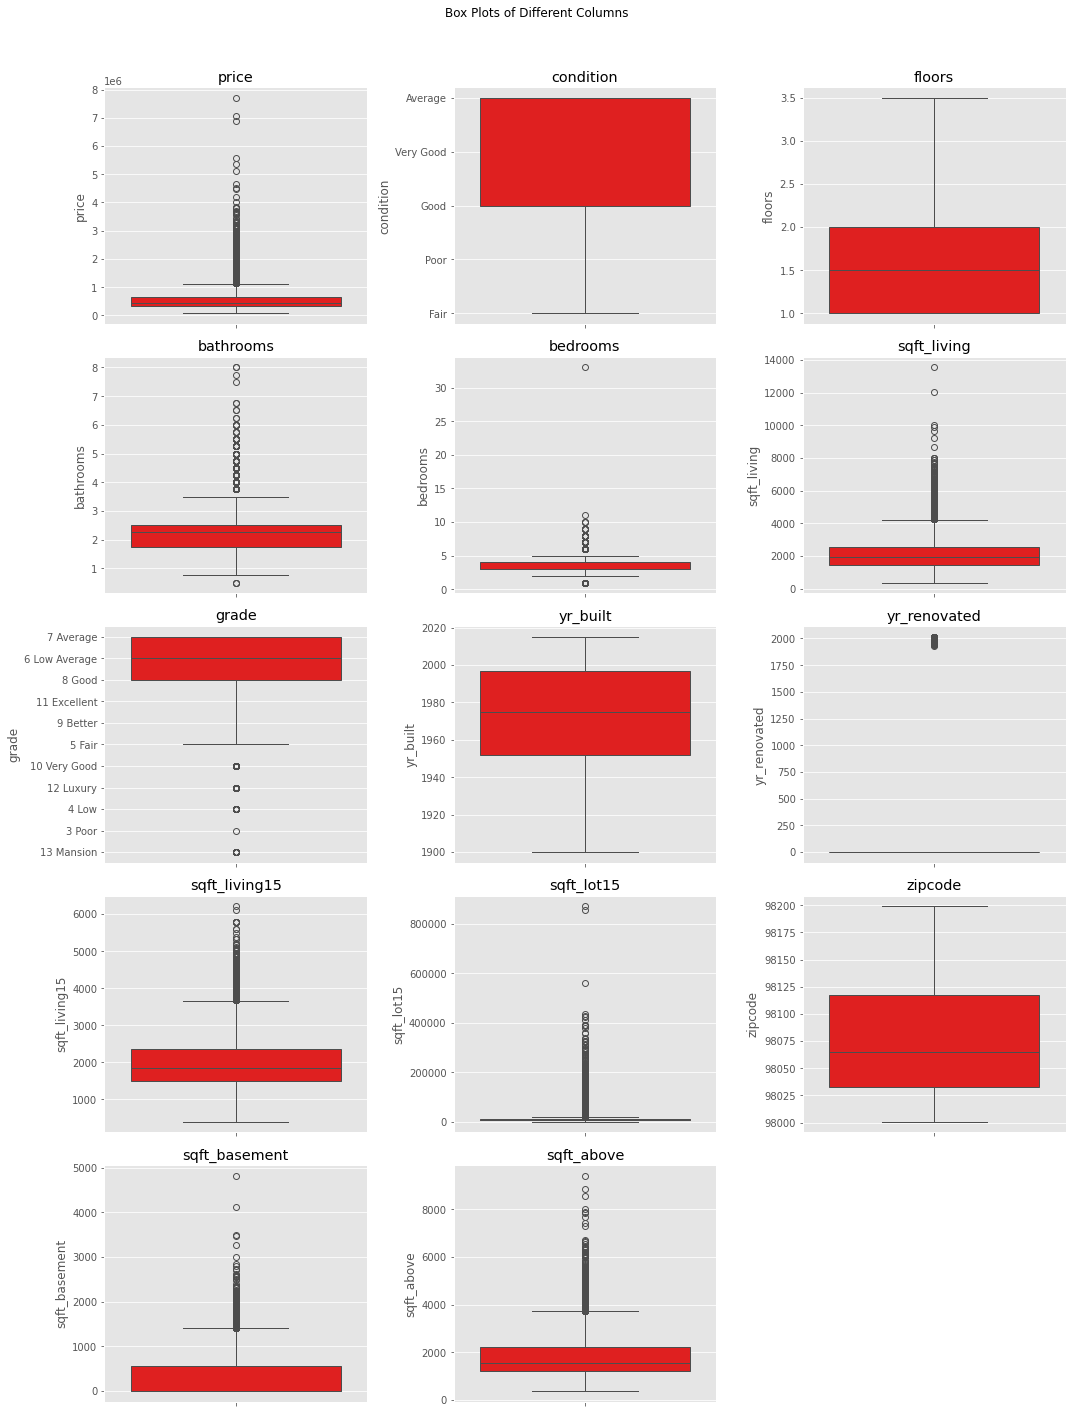

In [1793]:
# Outlier Analysis
# defining a function for plotting boxplot
def boxplot_graph(df1, number_of_columns, columns_to_plot):

    # Creating subplots
    num_columns = len(columns_to_plot)

    # Number of rows and columns for subplots
    ncols = number_of_columns
    nrows = math.ceil(num_columns/ ncols)

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 20))

    # Flatten the axes array for easy iteration
    axes = axes.flatten()

    # Plotting each column in a separate subplot
    for i, column in enumerate(columns_to_plot):
        sns.boxplot(y=df1[column], color="r", ax=axes[i])
        axes[i].set_title(column)

    # Remove any empty subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    # Adjust the layout to add space between rows
    plt.subplots_adjust(hspace=3) 

    plt.suptitle('Box Plots of Different Columns')
    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to make room for the main title
    return plt.show()

# Listing the columns to Plot
columns_to_plot_ = ['price', 'condition', 'floors', 
                    'bathrooms', 'bedrooms', 'sqft_living', 
                    'grade', 'yr_built', 'yr_renovated', 
                    'sqft_living15', 'sqft_lot15','zipcode',
                    'sqft_basement', 'sqft_above']

# Plotting the boxplot for the defined columns
boxplot_graph(df_clean_1, 3, columns_to_plot_)


##### **Columns and Interpretation:**

* Price: Shows the distribution of property prices. The majority of prices are clustered towards the lower end, with a few significant outliers indicating much higher prices.
* condition: Reflects the distribution of property conditions, categorized numerically. The majority of properties are in better condition, with fewer properties in poor condition.
* floors: Displays the number of floors in the properties. Most properties have between 1.5 and 2.5 floors.
* bathrooms: Indicates the distribution of the number of bathrooms. Most properties have around 2-3 bathrooms, with outliers having significantly more.
* bedrooms: Shows the distribution of the number of bedrooms. The majority have around 3 bedrooms, with a few properties having significantly more.
* sqft_living: Represents the square footage of the living area. The data is right-skewed with many * * outliers indicating larger properties.
* grade: Displays the distribution of property grades. Most properties are graded between 7 and 10.
* yr_built: Reflects the distribution of the years properties were built. Most properties were built in the mid to late 20th century.
* yr_renovated: Shows the distribution of renovation years. Most properties have not been renovated, as indicated by the clustering at the bottom.
* sqft_living15: Represents the square footage of living space in 2015. Similar to sqft_living, the data is right-skewed with several larger properties as outliers.
* sqft_lot15: Indicates the square footage of the lot in 2015. The data is highly right-skewed with many outliers representing larger lots

#### **Outlier Removal**

The percentage of outliers removed is 5 %


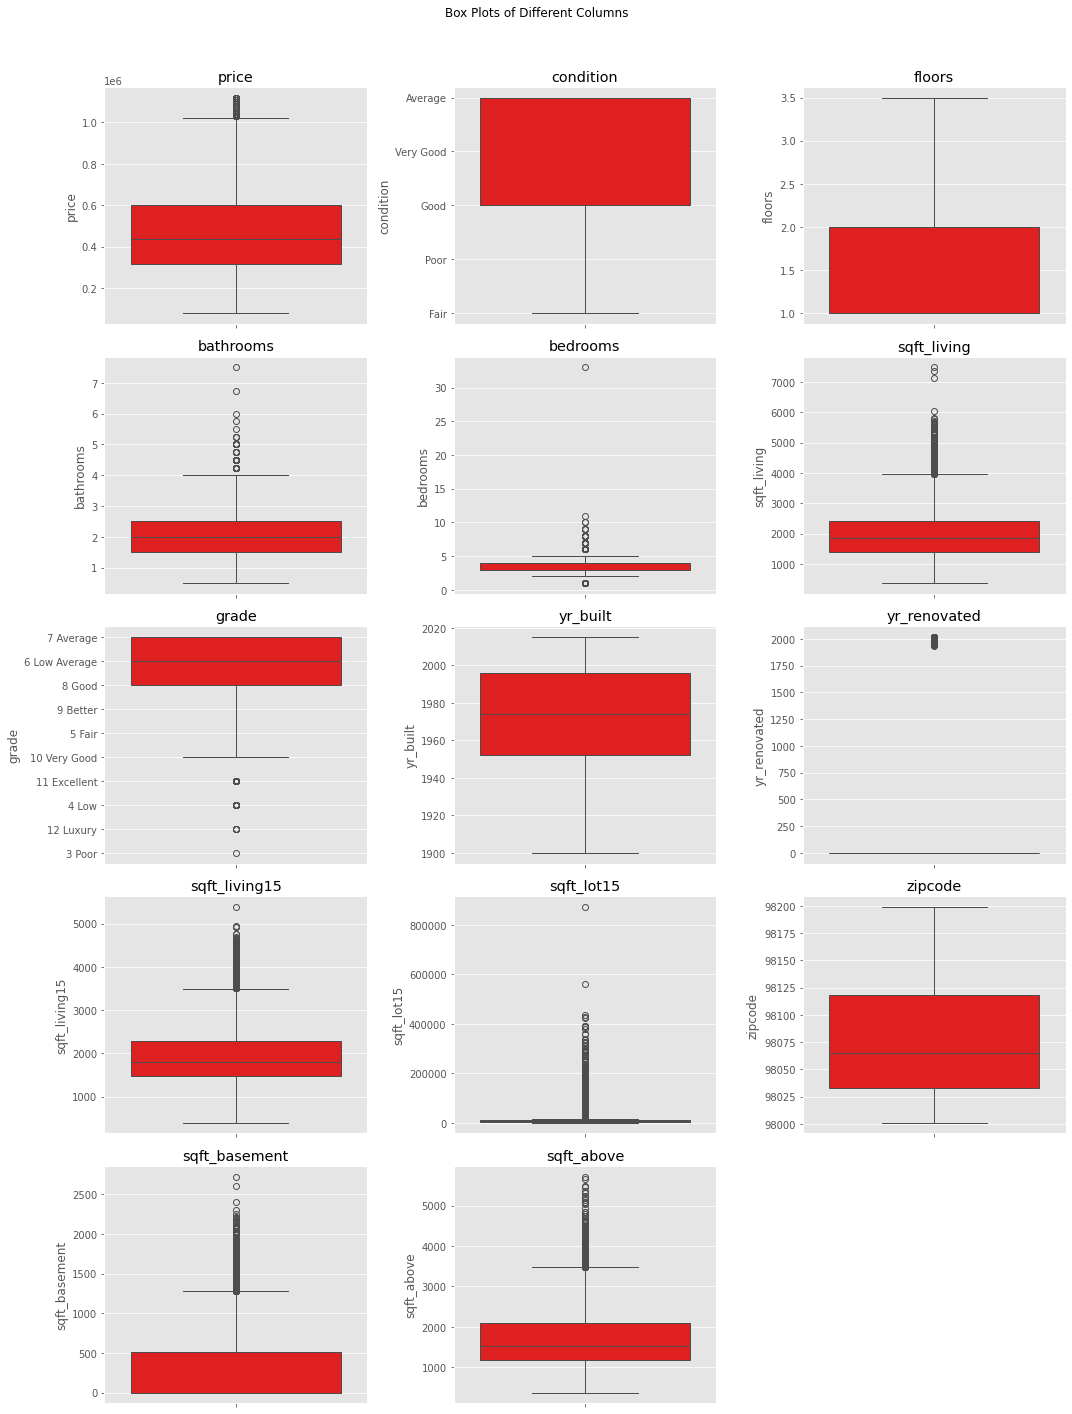

In [1794]:
# Function to remove outliers
def remove_outliers(df2, columns):
    for column in columns:
        Q1 = df2[column].quantile(0.25)
        Q3 = df2[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df2 = df2[(df2[column] >= lower_bound) & (df2[column] <= upper_bound)]
    return df2

# Remove outliers from the specified columns
df_clean_2 = remove_outliers(df_clean_1, ['price'])

# percentage of outliers removed
print("\033[1mThe percentage of outliers removed is", round((len(df_clean_1)-len(df_clean_2))/len(df_clean_1)*100), "%\033[0m")

# Display the cleaned DataFrame
boxplot_graph(df_clean_2, 3, columns_to_plot_)



##### **Outlier in Number of Bedrooms**

In [1795]:
# Listing the number of bedrooms in descending order and identifying zipcode with the outlier number of bedrooms
df_clean_2 = df_clean_2.sort_values(by='bedrooms', ascending=False).reset_index(drop=True)
print(df_clean_2[['zipcode','bedrooms']])
print(df_clean_2.shape)

       zipcode  bedrooms
0        98103        33
1        98106        11
2        98006        10
3        98105        10
4        98144         9
...        ...       ...
19946    98168         1
19947    98117         1
19948    98126         1
19949    98125         1
19950    98003         1

[19951 rows x 2 columns]
(19951, 21)


#### **Observation**

one house has an extreneous value of 33 bedrooms. The value is replace by the median value all houses with the corresponding zipcodes

In [1796]:

# Filtering locations with zipcode 98103 similar to the house with an outlier of 33 bedroms as shown above 
filtered_df = df_clean_2[df_clean_2['zipcode'] == 98103].reset_index()
filtered_df.sort_values(by='bedrooms', ascending=False).reset_index()

# getting the median value for houses in zipcode 98103
median_bedrooms = filtered_df['bedrooms'].median()
print('The median value for houses in zipcode 98103 is', median_bedrooms)
print('-------------------------')
# Zipcode and number of bedrooms in that zipcodes
print(filtered_df[['zipcode','bedrooms']])


# Replacing a the outlier house with outlier bedrooms with the median for the houses in the zicode
df_clean_2['bedrooms'] = df_clean_2['bedrooms'].replace(33, median_bedrooms)

#filtering zip code 98103
df_clean_3 = df_clean_2[df_clean_2['zipcode'] == 98103].reset_index()

print('-------------------------')

#rechecking shape of the cleaned dataframe
print(df_clean_3[['zipcode','bedrooms']])

df_clean_3.shape
df_clean_2.shape


The median value for houses in zipcode 98103 is 3.0
-------------------------
     zipcode  bedrooms
0      98103        33
1      98103         9
2      98103         7
3      98103         6
4      98103         6
..       ...       ...
568    98103         1
569    98103         1
570    98103         1
571    98103         1
572    98103         1

[573 rows x 2 columns]
-------------------------
     zipcode  bedrooms
0      98103         3
1      98103         9
2      98103         7
3      98103         6
4      98103         6
..       ...       ...
568    98103         1
569    98103         1
570    98103         1
571    98103         1
572    98103         1

[573 rows x 2 columns]


(19951, 21)

#### **Checking the dates column for correct format**

In [1797]:
# Checking format of all date time
df_clean[['date', 'yr_renovated', 'yr_built']].sort_values(by='yr_renovated', ascending=False).head(10).reset_index()


,index,date,yr_renovated,yr_built
0,15345,2015-03-31,2015.0,1968
1,3013,2015-05-06,2015.0,1964
2,7300,2015-01-23,2015.0,1954
3,2670,2014-10-28,2015.0,1940
4,10993,2014-07-28,2015.0,1922
5,16139,2015-03-20,2015.0,1961
6,15492,2015-03-05,2015.0,1954
7,7497,2014-10-06,2015.0,1955
8,12217,2015-03-27,2015.0,1962
9,14714,2015-05-01,2015.0,1956


The date of the house sale is in a wrong format

In [1798]:
#conversion of date of house sale to dtype datetime to confirm timeframe of dataset
df_clean['date'] = pd.to_datetime(df_clean["date"])
df_clean

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,1225069038,2014-05-05,2280000.0,7,8.00,13540,307752,3.0,NO,EXCELLENT,...,12 Luxury,9410,4130.0,1999,0.0,98053,47.6675,-121.986,4850,217800
1,9208900037,2014-09-19,6890000.0,6,7.75,9890,31374,2.0,NO,EXCELLENT,...,13 Mansion,8860,1030.0,2001,0.0,98039,47.6305,-122.240,4540,42730
2,6762700020,2014-10-13,7700000.0,6,8.00,12050,27600,2.5,NO,GOOD,...,13 Mansion,8570,3480.0,1910,1987.0,98102,47.6298,-122.323,3940,8800
3,6072800246,2014-07-02,3300000.0,5,6.25,8020,21738,2.0,NO,NONE,...,11 Excellent,8020,0.0,2001,0.0,98006,47.5675,-122.189,4160,18969
4,2426039123,2015-01-30,2420000.0,5,4.75,7880,24250,2.0,NO,AVERAGE,...,13 Mansion,7880,0.0,1996,0.0,98177,47.7334,-122.362,2740,10761
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21077,4322200105,2015-03-31,229050.0,1,1.00,420,3298,1.0,NO,NONE,...,4 Low,420,0.0,1949,0.0,98136,47.5375,-122.391,1460,4975
21078,6303400395,2015-01-30,325000.0,1,0.75,410,8636,1.0,NO,NONE,...,4 Low,410,0.0,1953,0.0,98146,47.5077,-122.357,1190,8636
21079,9266700190,2015-05-11,245000.0,1,1.00,390,2000,1.0,NO,NONE,...,6 Low Average,390,0.0,1920,0.0,98103,47.6938,-122.347,1340,5100
21080,1723049033,2014-06-20,245000.0,1,0.75,380,15000,1.0,NO,NONE,...,5 Fair,380,0.0,1963,0.0,98168,47.4810,-122.323,1170,15000


# 4. **EXPLORATORY DATA ANALYSIS**

#### **HISTOGRAM PLOT**

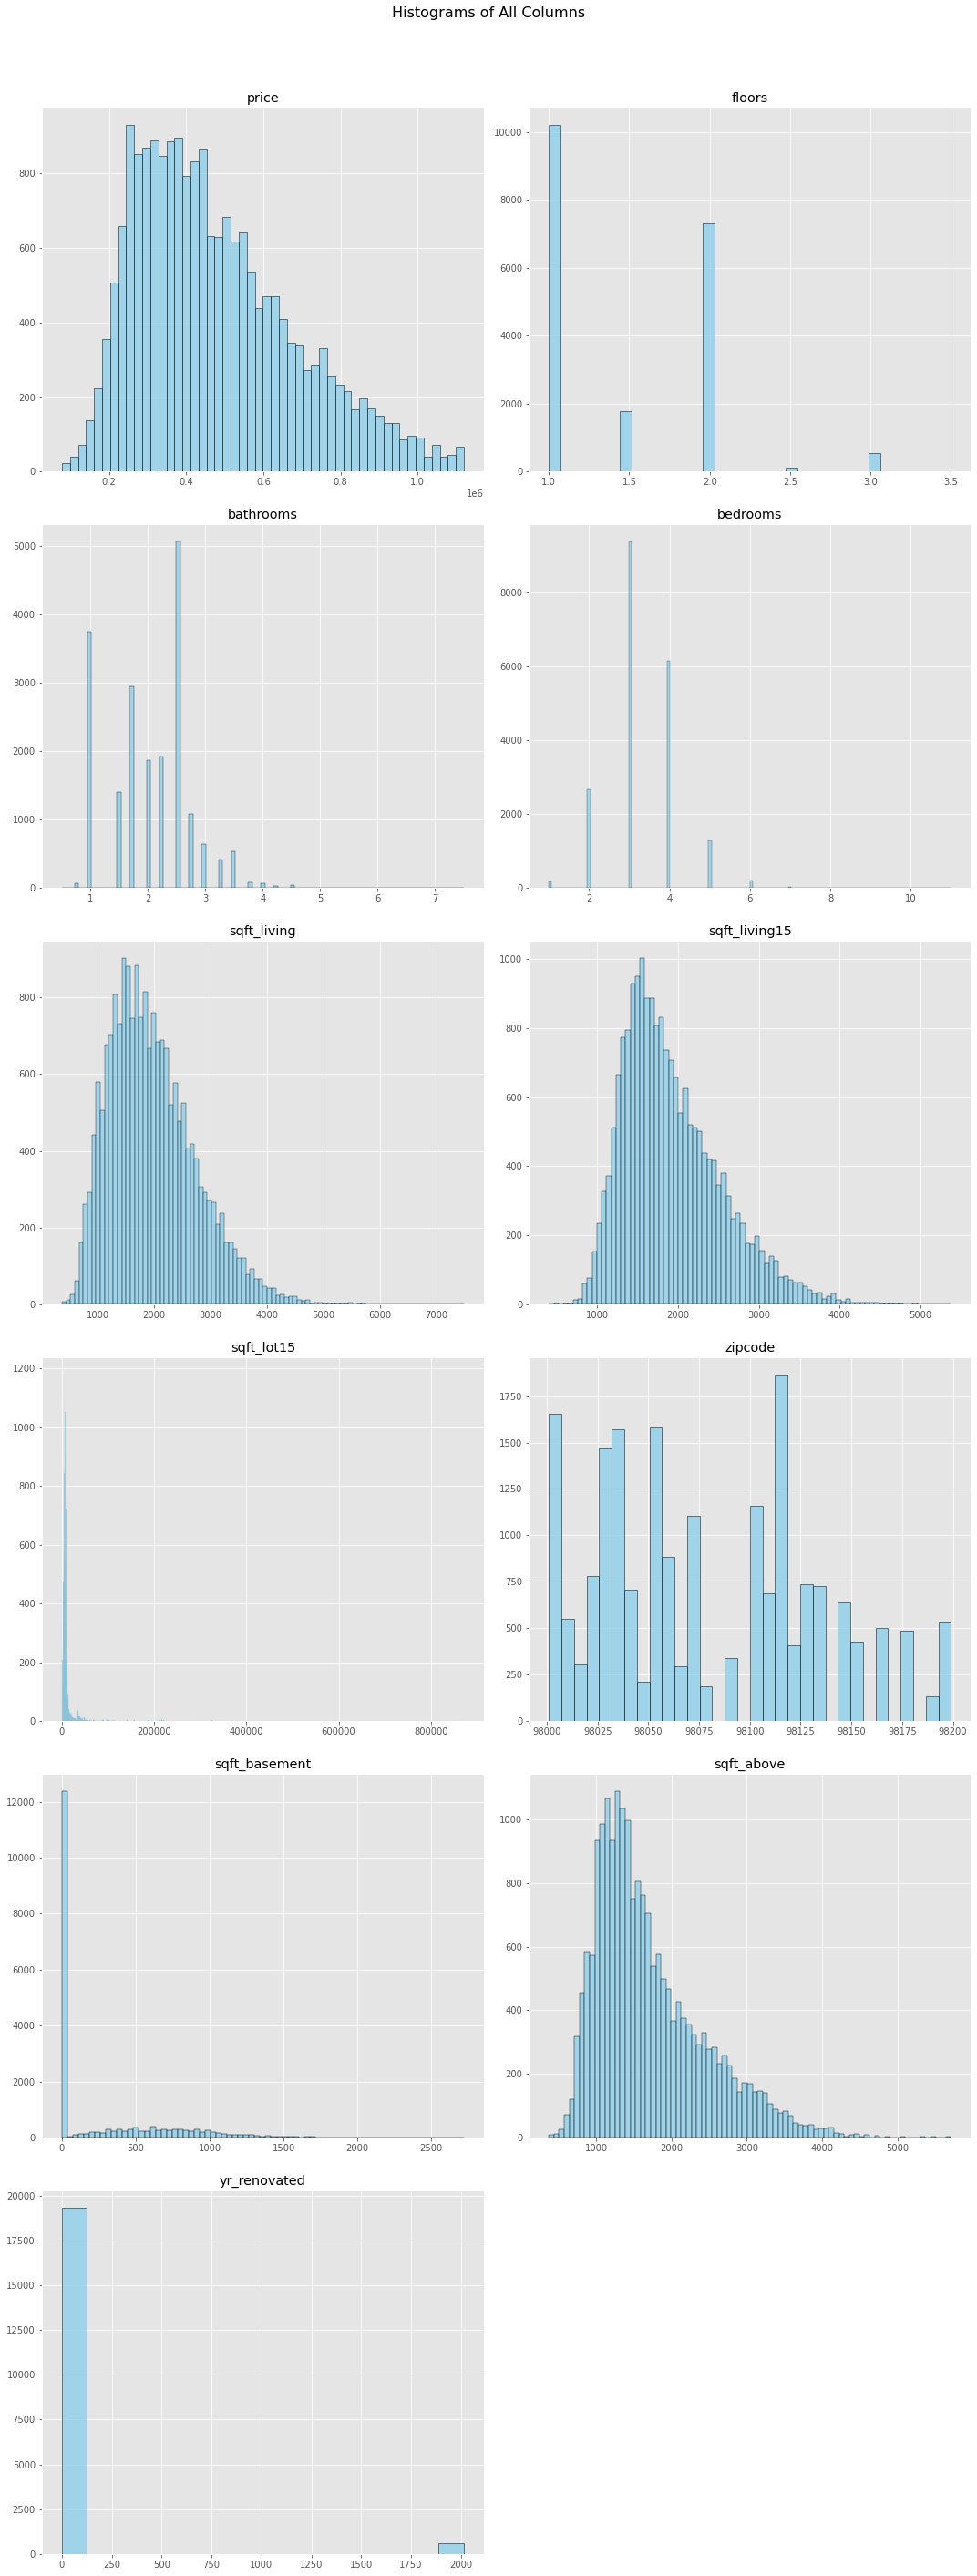

In [1799]:
# Defining histogram plots
def histogram_plot(df3, number_of_columns, columns_to_plot):

    # Creating subplots
    num_columns = len(columns_to_plot)

    # Number of rows and columns for subplots
    ncols = number_of_columns
    nrows = math.ceil(num_columns/ ncols)
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 40))
    axes = axes.flatten()

    # Plot each column using seaborn
    for i, col in enumerate(columns_to_plot):
        sns.histplot(df3[col], kde=False, ax=axes[i], color='skyblue', edgecolor='black')
        axes[i].set_title(col)
        axes[i].set_xlabel('')
        axes[i].set_ylabel('')

    # Remove any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.suptitle('Histograms of All Columns', fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    return plt.show()

# Listing column to plot
columns_to_plot_ = ['price', 'floors', 
                    'bathrooms', 'bedrooms', 'sqft_living', 
                    'sqft_living15', 'sqft_lot15','zipcode',
                    'sqft_basement', 'sqft_above', 'yr_renovated']

# Plotting the histogram for the defined columns
histogram_plot(df_clean_2, 2, columns_to_plot_)

#### **Observations**
The image presents a series of histograms, each illustrating the distribution of values across various columns in a dataset. The first histogram for "price" reveals that most house prices cluster below 1 million, with a gradual decrease as prices rise. The "floors" histogram shows that the majority of houses have either 1 or 2 floors, with fewer houses having 1.5 or 3 floors and very few having more than 3 floors, indicating outliers. For "bathrooms," most houses have between 1 and 3 bathrooms, with very few having more. In the "bedrooms" histogram, most houses feature between 2 and 4 bedrooms, with an outlier showing a significantly higher number of bedrooms.

The "sqft_living" histogram indicates that most houses have between 1,000 and 3,000 square feet of living space, with a slight right skew showing some houses with significantly larger living spaces. Similarly, the "sqft_living15" histogram shows that the majority of houses in 2015 had between 1,000 and 3,000 square feet. The "sqft_lot15" histogram illustrates that most lots are small, with a sharp decline in frequency as lot size increases and some notable outliers with very large lot sizes. The "zipcode" histogram displays the distribution of houses across a wide range of zipcodes, with certain zipcodes having a higher concentration of houses.

The "sqft_basement" histogram shows that most houses do not have a basement, as indicated by a large number of zero values. For those with basements, the square footage is spread out, with fewer instances of larger basements. Lastly, the "sqft_above" histogram indicates that the majority of houses have between 1,000 and 3,000 square feet of above-ground living space, similar to the distribution seen in the "sqft_living" histogram. Overall, these histograms provide a comprehensive visual summary of the distributions of various house-related attributes in the dataset, with most distributions showing a right skew due to the presence of outliers with significantly higher values than the majority.

### **SCATTER PLOT**

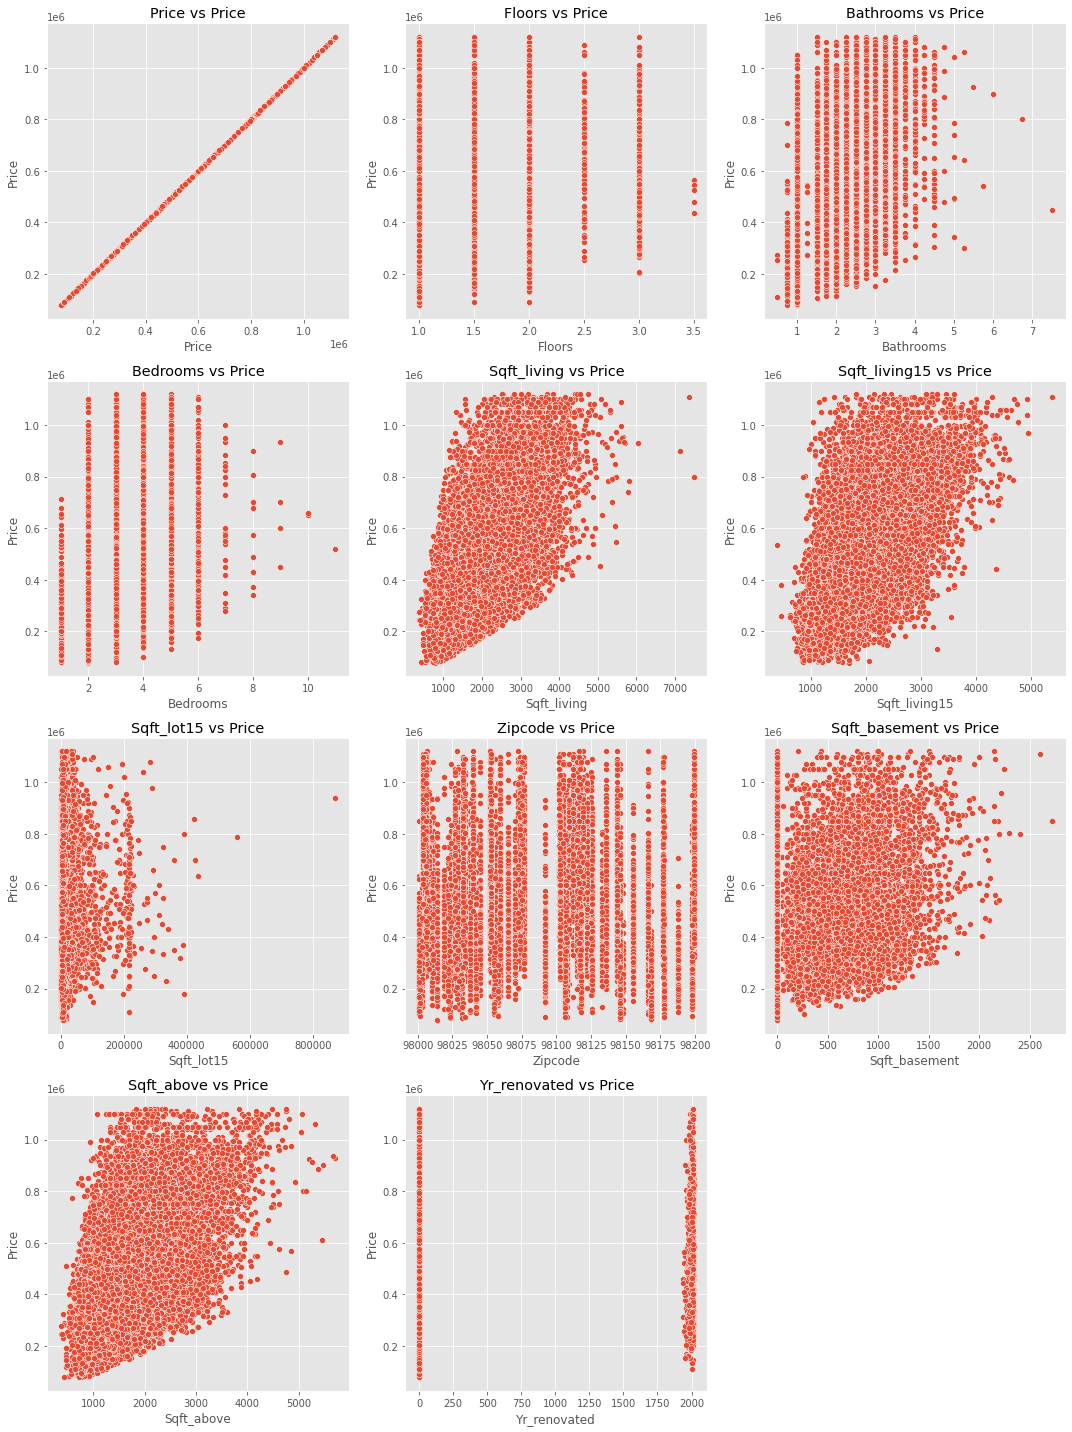

In [1800]:
def plot_numerical_vs_price(df4, numerical_columns):
    """
    Plot numerical columns against the price column in a DataFrame.

    Parameters:
        df4 (DataFrame): The DataFrame containing the data.
        numerical_columns (list): A list of numerical column names.

    Returns:
        None
    """
    num_cols = len(numerical_columns)
    rows = (num_cols + 2) // 3  # Adjust for odd number of columns
    plt.figure(figsize=(15, 5 * rows))
    for i, column in enumerate(numerical_columns):
        plt.subplot(rows, 3, i+1)
        sns.scatterplot(x=df4[column], y=df4['price'])
        plt.title(f'{column.capitalize()} vs Price')
        plt.xlabel(column.capitalize())
        plt.ylabel('Price')
    plt.tight_layout()
    plt.show()

plot_numerical_vs_price(df_clean_2, columns_to_plot_)

In [1801]:
df_clean_2['years_since_renovated'] = 2015 - df_clean_2['yr_renovated']


In [1802]:
df_clean_2

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,years_since_renovated
0,2402100895,6/25/2014,640000.0,3,1.75,1620,6000,1.0,NO,NONE,...,1040,580.0,1947,0.0,98103,47.6878,-122.331,1330,4700,2015.0
1,1773100755,8/21/2014,520000.0,11,3.00,3000,4960,2.0,NO,NONE,...,2400,600.0,1918,1999.0,98106,47.5560,-122.363,1420,4960,16.0
2,5566100170,10/29/2014,650000.0,10,2.00,3610,11914,2.0,NO,NONE,...,3010,600.0,1958,0.0,98006,47.5705,-122.175,2040,11914,2015.0
3,8812401450,12/29/2014,660000.0,10,3.00,2920,3745,2.0,NO,NONE,...,1860,1060.0,1913,0.0,98105,47.6635,-122.320,1810,3745,2015.0
4,424049043,8/11/2014,450000.0,9,7.50,4050,6504,2.0,NO,NONE,...,4050,0.0,1996,0.0,98144,47.5923,-122.301,1448,3866,2015.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19946,985001015,6/4/2014,135000.0,1,1.00,790,13062,1.0,NO,NONE,...,790,0.0,1942,0.0,98168,47.4919,-122.311,1240,7137,2015.0
19947,461002551,10/4/2014,330600.0,1,1.00,580,1799,1.0,NO,NONE,...,580,0.0,1908,2005.0,98117,47.6829,-122.375,1260,4000,10.0
19948,2853600155,9/15/2014,110000.0,1,1.00,640,10280,1.0,NO,NONE,...,640,0.0,1920,0.0,98126,47.5144,-122.368,1090,9000,2015.0
19949,5101405604,8/14/2014,350000.0,1,1.00,900,6380,1.0,NO,NONE,...,900,0.0,1947,0.0,98125,47.7019,-122.311,1830,6380,2015.0


In [1773]:
filtered_df = df_clean_2[df_clean_2['years_since_renovated'] != 2015].reset_index()
filtered_df.sort_values(by='years_since_renovated', ascending=True).reset_index()

,level_0,index,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,years_since_renovated
0,62,1786,8665900328,1/23/2015,459000.0,4,3.00,1900,9077,2.0,...,1900,0.0,1954,2015.0,98155,47.7684,-122.304,1900,12868,0.0
1,33,809,3585900665,6/6/2014,805000.0,5,2.50,4600,19831,1.0,...,2300,2300.0,1956,2015.0,98177,47.7608,-122.378,2890,19831,0.0
2,196,6318,8935100100,7/1/2014,476000.0,4,3.00,2890,6885,1.0,...,1590,1300.0,1945,2015.0,98115,47.6763,-122.282,2180,6885,0.0
3,115,3647,7284900030,5/22/2014,850000.0,4,3.25,3090,6744,2.0,...,3090,0.0,1923,2015.0,98177,47.7680,-122.388,2020,6656,0.0
4,237,7611,5113000420,3/20/2015,420000.0,4,2.75,2400,20000,1.0,...,1170,1230.0,1961,2015.0,98058,47.4556,-122.087,1690,20000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604,546,18217,582000135,6/22/2014,565000.0,2,1.75,1330,6000,1.0,...,960,370.0,1914,1945.0,98199,47.6539,-122.396,1620,6000,70.0
605,296,9311,7625701830,10/23/2014,521000.0,3,2.00,1840,6000,1.0,...,1840,0.0,1908,1944.0,98136,47.5508,-122.392,2010,6000,71.0
606,514,17550,2754700170,8/4/2014,443500.0,2,1.00,1330,4140,1.0,...,930,400.0,1919,1940.0,98115,47.6802,-122.306,1410,5100,75.0
607,513,17465,148000440,8/18/2014,313300.0,2,1.00,970,4800,1.0,...,970,0.0,1911,1940.0,98116,47.5754,-122.414,1180,5900,75.0


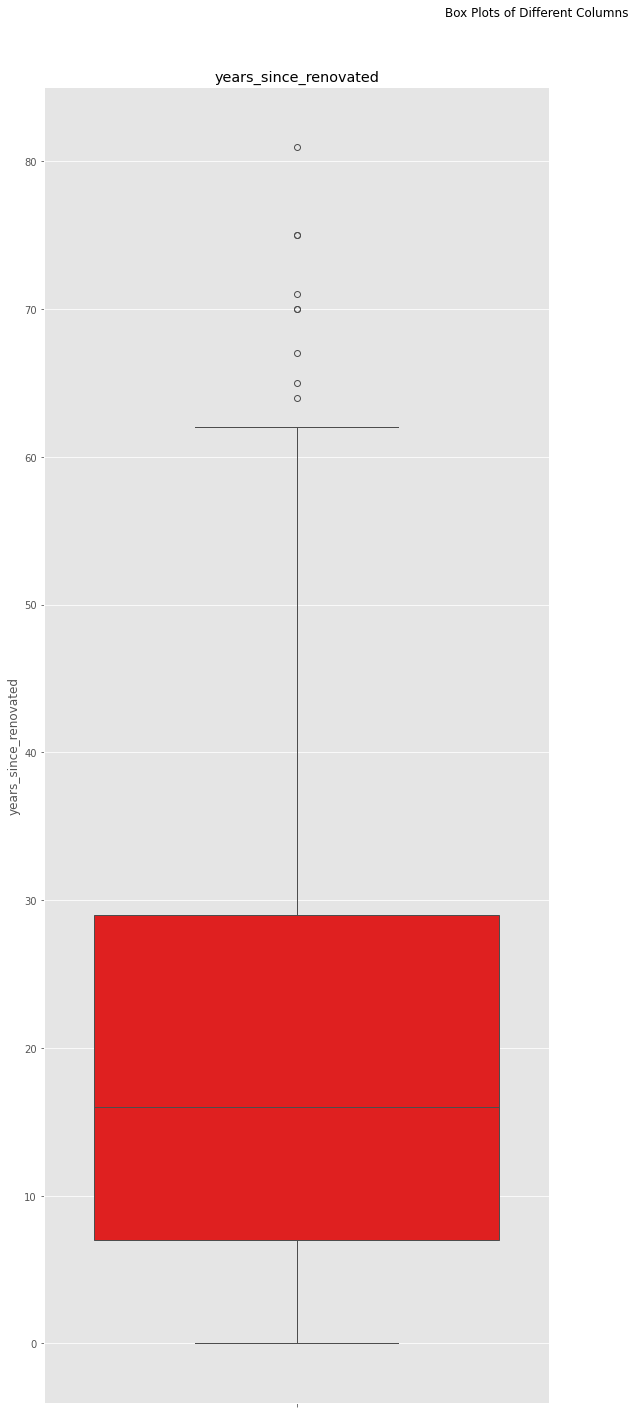

In [1770]:
boxplot_graph(filtered_df, 2, ['years_since_renovated'])


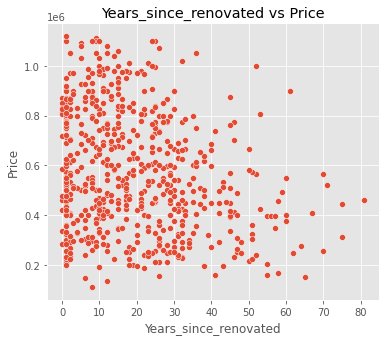

In [1771]:
plot_numerical_vs_price(filtered_df, ['years_since_renovated'])